In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/rae/Desktop/jiuzhang--Rae--practice/rfm_final.csv')

In [3]:
from IPython.core.interactiveshell import InteractiveShell

In [4]:
quintiles=df[['recency','frequency','monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles

{'recency': {0.2: 95.0, 0.4: 180.0, 0.6: 272.0, 0.8: 387.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 110.99, 0.8: 189.0}}

# Part II: RFM scores calculation

In [5]:
def r_score(x,c):
    if x<=quintiles[c][0.2]:
        return 5
    elif x<=quintiles[c][0.4]:
        return 4
    elif x<=quintiles[c][0.6]:
        return 3
    elif x<=quintiles[c][0.8]:
        return 2
    else:
        return 1

In [6]:
df['r']=df['recency'].apply(lambda x: r_score(x,'recency'))

In [7]:
df['r'].value_counts()

3    18784
5    18724
4    18685
2    18610
1    18593
Name: r, dtype: int64

In [8]:
def m_score(x,c):
    if x<=quintiles[c][0.2]:
        return 1
    elif x<=quintiles[c][0.4]:
        return 2
    elif x<=quintiles[c][0.6]:
        return 3
    elif x<=quintiles[c][0.8]:
        return 4
    else:
        return 5

In [9]:
df['m']=df['monetary'].apply(lambda x: m_score(x,'monetary'))

In [10]:
df['m'].value_counts()

2    19081
1    18846
4    18809
5    18549
3    18111
Name: m, dtype: int64

In [11]:
def f_score(x,c):
    if x<=1:
        return 1
    elif x<=2:
        return 2
    elif x<=3:
        return 3
    elif x<=5:
        return 4
    else:
        return 5

In [12]:
df['f']=df['frequency'].apply(lambda x: f_score(x,'frequency'))

In [13]:
df['f'].value_counts()

1    79377
2    10227
3     1973
4     1277
5      542
Name: f, dtype: int64

# Part III: Combine RFM scores into one field

In [14]:
df['rfm']=df['r'].map(str) + df['f'].map(str) + df['m'].map(str)
df.head()

,customer_unique_id,recency,frequency,monetary,length,rating,avg_pay_install,r,m,f,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,129.90,0.0,5.0,8.0,4,4,1,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,0.0,4.0,1.0,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,0.0,3.0,8.0,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,0.0,4.0,4.0,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,0.0,5.0,6.0,2,4,1,214


# Part IV: Customer segmentation

In [15]:
segt_map_normal={
    
    r'[1-2][1-2]':'hibernating',
    r'[1-2][3-4]':'at risk',
    r'[1-2]5':'can\'t lose',
    r'3[1-2]':'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'    
}

In [22]:
segt_map={
    
    r'[1-2]1': 'hibernating',
    r'[1-2][2-3]': 'at risk',
    r'[1-2][4-5]': 'can\'t lose',
    
    r'3[1]': 'about to sleep',
    r'32': 'need attention',
    r'[3-4][3-5]': 'loyal customers',
    
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5]2': 'potential loyalists',
    r'5[3-5]': 'champions'    
}

In [23]:
df['segment']=df['r'].map(str) + df['f'].map(str)
df['segment']=df['segment'].replace(segt_map, regex=True)
df.head()

,customer_unique_id,recency,frequency,monetary,length,rating,avg_pay_install,r,m,f,rfm,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,129.90,0.0,5.0,8.0,4,4,1,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,0.0,4.0,1.0,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,0.0,3.0,8.0,1,2,1,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,0.0,4.0,4.0,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,0.0,5.0,6.0,2,4,1,214,hibernating


In [24]:
df['segment'].value_counts()

hibernating            31510
new customers          16031
about to sleep         16002
promising              15834
at risk                 4905
potential loyalists     4057
need attention          2059
loyal customers         1484
can't lose               788
champions                726
Name: segment, dtype: int64

Text(0.5, 1.0, 'Customer segmentation')

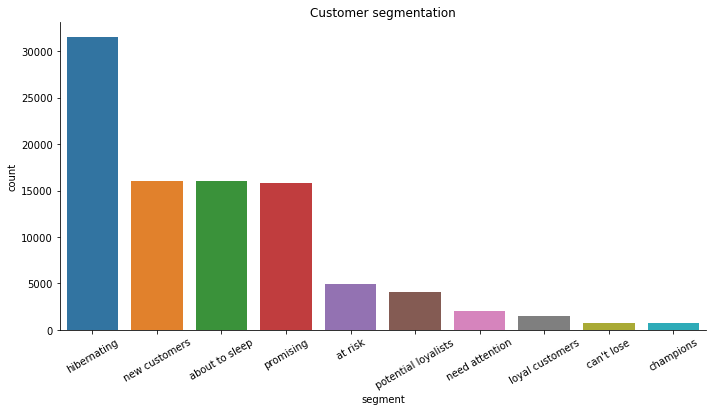

In [25]:
sns.catplot(data=df,x='segment',kind='count',aspect=2,
           order=df['segment'].value_counts().index).set_xticklabels(rotation=30)
plt.title('Customer segmentation')

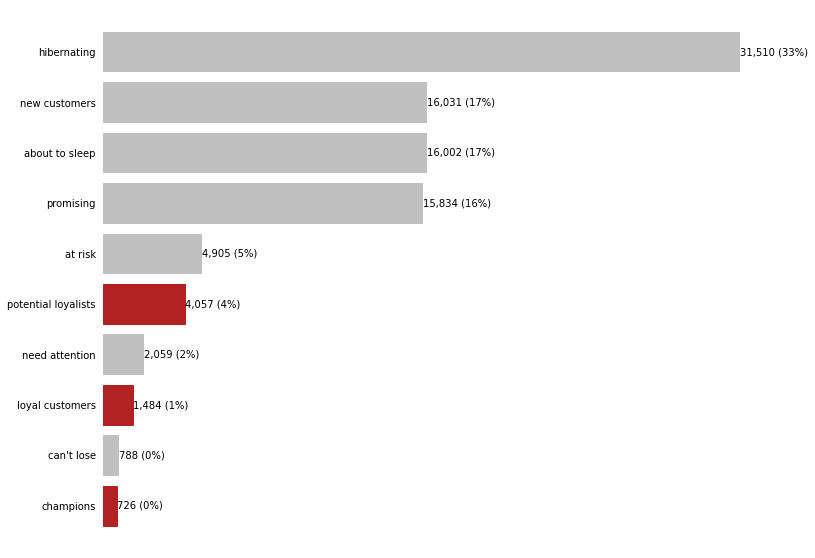

In [26]:
# count the number of customers in each segment
segments_counts = df['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12,10))

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers','potential loyalists']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )


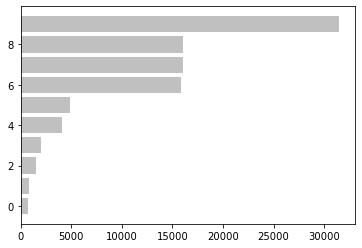

In [27]:
segments_counts = df['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)), segments_counts,  color='silver')


for i, bar in enumerate(bars):
        value = bar.get_width()
        